# Question 2: How many fatal log entries in the month of September resulted from a ”major internal error”

# Section 1: Data Preparation and Preprocessing

**IMPORTING NECESSARY LIBRARIES**

In [1]:
#https://spark.apache.org/docs/latest/api/python/getting_started/quickstart_df.html

# Importinng 'SparkSession' module which is the main entry point for DataFrame and SQL functionality. SparkSession can be used create DataFrame, register DataFrame as tables, execute SQL over tables and cache tables.
from pyspark.sql import SparkSession

# Importing 'Date (datetime.date)', 'Timestamp (datetime.datetime)' , 'Double' data type from 'Data Types' module  
from pyspark.sql.types import DateType, TimestampType, DoubleType

# importing built-in functions available for DataFrame.
from pyspark.sql.functions import to_date, to_timestamp, col, month

# Importing 'matplotlib.pyplot' module for creating and customizing plots and visualizations. 
# 'pyplot' is a part of the Matplotlib library and provides a user-friendly interface to create different types of plots.
import matplotlib.pyplot as plt

# Importing'time' module for measuring execution time.
# https://docs.python.org/3/library/time.html
import time

**EXECUTION TIME COUNTER START**

In [2]:
# Recording the starting time of the execution using the 'time.perf_counter()' function.It provides a high-resolution timer that measures the time elapsed in seconds to measure its execution time.
executiontimestart= time.perf_counter()

In [3]:
# Initializing SparkSession named 'ScpProject' using the SparkSession builder.
session = SparkSession.builder.appName('ScpProject').getOrCreate()

23/08/11 21:12:43 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [4]:
# Reading data from CSV file into a DataFrame 'bgl_log_df'
bgl_log_df = session.read.csv("BGLnew.log", sep=',', inferSchema=True, header=False)

In [5]:
# Renaming the columns 'toDF()' method for better understanding into our dataframe.
bgl_log_df = bgl_log_df.toDF('alert_message_flag', 'timestamp', 'date', 'node', 'date_and_time', 'node_repeated',
                             'message_type', 'system_component', 'level', 'message_content')


In [6]:
# Parsing 'date' column to standard DateType
bgl_log_df = bgl_log_df.withColumn('date', to_date('date', 'yyyy.MM.dd'))

In [7]:
# Parsing 'date_and_time' column to standard TimestampType
bgl_log_df = bgl_log_df.withColumn('date_and_time', to_timestamp('date_and_time', 'yyyy-MM-dd-HH.mm.ss.SSSSSS'))

In [8]:
# Casting columns to appropriate data types
bgl_log_df = bgl_log_df.withColumn("timestamp", bgl_log_df["timestamp"].cast(TimestampType())) \
    .withColumn("date", bgl_log_df["date"].cast(DateType())) \
    .withColumn("date_and_time", bgl_log_df["date_and_time"].cast(TimestampType()))

In [9]:
# Using 'printSchema()' method to display the updated schema of the DataFrame 'bgl_log_df'.
bgl_log_df.printSchema()

root
 |-- alert_message_flag: string (nullable = true)
 |-- timestamp: timestamp (nullable = true)
 |-- date: date (nullable = true)
 |-- node: string (nullable = true)
 |-- date_and_time: timestamp (nullable = true)
 |-- node_repeated: string (nullable = true)
 |-- message_type: string (nullable = true)
 |-- system_component: string (nullable = true)
 |-- level: string (nullable = true)
 |-- message_content: string (nullable = true)



**DATA PREPRATION AND PREPROCESSING COMPLETED**

In [10]:
# We are using the 'show()' method to display the DataFrame 'bgl_log_df' in a vertical format.
# The 'vertical=True' argument is used to display the DataFrame vertically, showing each row in a single line.
# The 'truncate=False' argument is used to prevent truncation of column values, ensuring complete visibility of the data.
bgl_log_df.show(truncate=False, vertical=True)

-RECORD 0------------------------------------------------------
 alert_message_flag | -                                        
 timestamp          | 2005-06-03 22:42:50                      
 date               | 2005-06-03                               
 node               | R02-M1-N0-C:J12-U11                      
 date_and_time      | 2005-06-03 15:42:50.363779               
 node_repeated      | R02-M1-N0-C:J12-U11                      
 message_type       | RAS                                      
 system_component   | KERNEL                                   
 level              | INFO                                     
 message_content    | instruction cache parity error corrected 
-RECORD 1------------------------------------------------------
 alert_message_flag | -                                        
 timestamp          | 2005-06-03 22:42:50                      
 date               | 2005-06-03                               
 node               | R02-M1-N0-C:J12-U1

# Section 2: Log Data Analysis

**TOTAL NUMBER OF LOG ENTRIES IN THE LOG DATASET COUNT**

In [11]:
# Count total logs in the DataFrame
total_logs_count = bgl_log_df.count()

# Display the total number of logs
total_logs_count

4747963

**TOTAL NUMBER OF LOG ENTRIES WITH LEVEL AS 'FATAL'** -- STEP 1

In [12]:
# Filtering fatal log entries and counting them
fatal_logs = bgl_log_df.filter(col("level") == "FATAL")
fatal_logs_count = fatal_logs.count()
fatal_logs_count

855195

**TOTAL NUMBER OF LOG ENTRIES WITH LEVEL AS 'FATAL' IN THE MONTH OF 'SEPTEMBER'**--STEP 2

In [13]:
# Filtering fatal log entries for September and counting them
fatal_logs_september = bgl_log_df.filter((col("level") == "FATAL") & (month(col("date")) == 9))
fatal_logs_september_count = fatal_logs_september.count()
fatal_logs_september_count

81818

<span style="color:blue">***TOTAL NUMBER OF 'FATAL' LOG ENTRIES IN THE MONTH OF SEPTEMBER RESULTED FROM 'major intenral error'***--FINAL ANSWER</span>

In [14]:
# Filtering fatal log entries with "major internal error" in September and counting them
major_internal_error_september = fatal_logs_september.filter(col("message_content").contains("major internal error"))
major_internal_error_september_count = major_internal_error_september.count()
major_internal_error_september_count

10

<span style="color:blue">***LIST OF ALL 'FATAL' LOG ENTRIES IN THE MONTH OF SEPTEMBER RESULTED FROM 'major intenral error'***--FINAL ANSWER</span>

In [15]:
major_internal_error_september.show(truncate=False, vertical=True)

-RECORD 0-------------------------------------------------------------------------
 alert_message_flag | KERNMC                                                      
 timestamp          | 2005-09-19 13:13:01                                         
 date               | 2005-09-19                                                  
 node               | R12-M0-N0-C:J12-U01                                         
 date_and_time      | 2005-09-19 06:13:01.71549                                   
 node_repeated      | R12-M0-N0-C:J12-U01                                         
 message_type       | RAS                                                         
 system_component   | KERNEL                                                      
 level              | FATAL                                                       
 message_content    | machine check interrupt (bit=0x06): L3 major internal error 
-RECORD 1-------------------------------------------------------------------------
 ale

# Section 3: Visualization

** GROUPINNG CALCULATING COUNT OF EACH DISTINCT 'LEVEL' IN THE DATASET**

In [16]:
# Calculate the percentage of each 'level' log out of the total number of logs
log_level_types_counts = bgl_log_df.groupBy("level").count().orderBy("level")
log_level_types_counts_percentage = log_level_types_counts.withColumn("percentage", (log_level_types_counts["count"] / total_logs_count) * 100)
log_level_types_counts_percentage = log_level_types_counts_percentage.withColumn("percentage", col("percentage").cast(DoubleType()))

In [17]:
# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
log_level_types_counts_percentage_df_pd = log_level_types_counts_percentage.toPandas()

**VISUALISING LOG 'LEVEL' TYPES AND ITS PERCENTAGE** 'LEVEL' 'FATAL' is highlighted in <span style="color:red"> red</span>

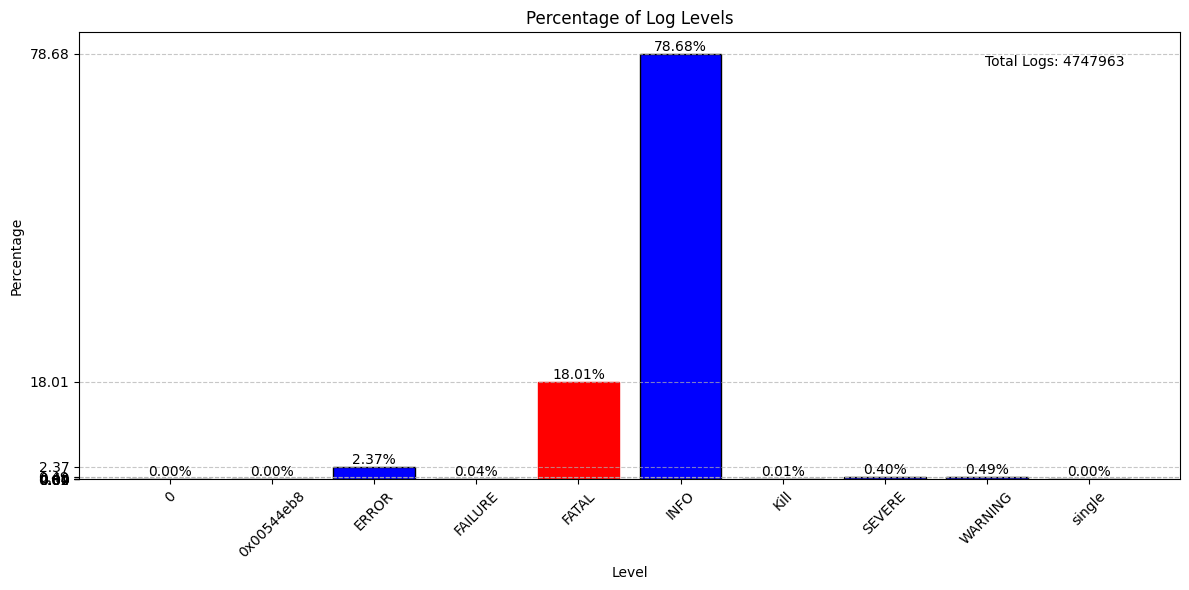

In [18]:
# Plot the bar chart for log levels percentage
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
plt.figure(figsize=(12, 6))
bars = plt.bar(log_level_types_counts_percentage_df_pd['level'], log_level_types_counts_percentage_df_pd['percentage'], color='b', edgecolor='black')
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, height, f"{height:.2f}%", ha='center', va='bottom')
plt.xlabel('Level')
plt.ylabel('Percentage')
plt.title('Percentage of Log Levels')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.yticks(log_level_types_counts_percentage_df_pd['percentage'])
fatal_index = log_level_types_counts_percentage_df_pd[log_level_types_counts_percentage_df_pd['level'] == 'FATAL'].index[0]
bars[fatal_index].set_color('red')
plt.text(0.95, 0.95, f"Total Logs: {total_logs_count}", transform=plt.gca().transAxes, ha='right', va='top')
plt.tight_layout()
plt.show()

**GROUPING FATAL LOG ENTRIES BY MONTH AND COUNTING NUMBER OF FATAL LOG ENTRIES IN EVERY MONTH** 'SEPTEMBER' MONTH 'FATAL' is highlighted in <span style="color:red"> red</span>

In [19]:
# Grouping fatal log entries by month and counting the number of entries for each month
fatal_logs_by_month = fatal_logs.groupBy(month("date").alias("month")).count().orderBy("month")

In [20]:
# Convert the DataFrame to a Pandas DataFrame for plotting
fatal_logs_by_month_pd = fatal_logs_by_month.toPandas()

**VISUALISING NUMBER OF FATAL LOG ENTRIES IN EVERY MONTH** 'SEPTEMBER' MONTH 'FATAL' is highlighted in <span style="color:red"> red</span>

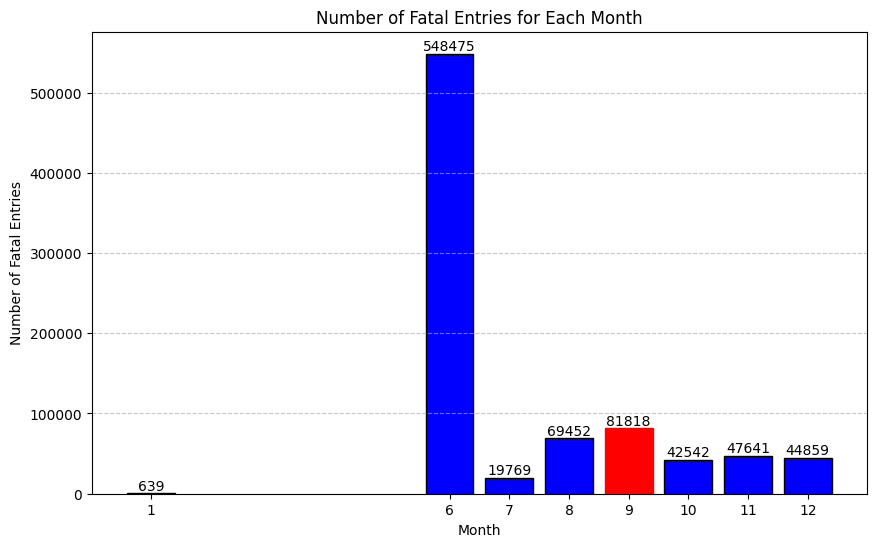

In [21]:
# Plotting the bar graph for fatal entries by month
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
plt.figure(figsize=(10, 6))
bars = plt.bar(fatal_logs_by_month_pd['month'], fatal_logs_by_month_pd['count'], color='b', edgecolor='black')
september_index = fatal_logs_by_month_pd[fatal_logs_by_month_pd['month'] == 9].index[0]
bars[september_index].set_color('red')
plt.xlabel('Month')
plt.ylabel('Number of Fatal Entries')
plt.title('Number of Fatal Entries for Each Month')
plt.xticks(fatal_logs_by_month_pd['month'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width() / 2, height, f"{int(height)}", ha='center', va='bottom')
plt.show()

In [22]:
# Group by date and count the occurrences for each day
error_counts_per_day = major_internal_error_september.groupBy("date").count().orderBy("date")

In [23]:
# Convert the PySpark DataFrame to a Pandas DataFrame for plotting
error_counts_per_day_pd = error_counts_per_day.toPandas()

<span style="color:blue">**VISUALISING NUMBER OF FATAL LOG ENTRIES IN THE MONTH OF SEPTEMBER OVER TIME RESULTING FROM 'major intenral error**</span>

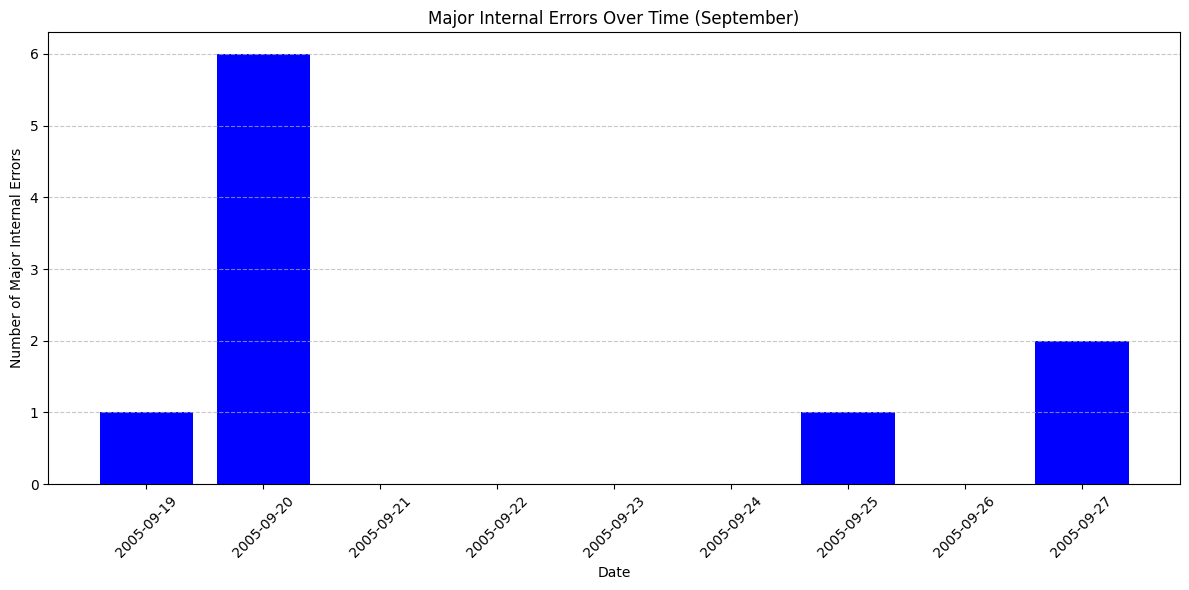

In [24]:
# Plot the bar chart for major internal errors over time in September
# https://www.geeksforgeeks.org/bar-plot-in-matplotlib/
plt.figure(figsize=(12, 6))
plt.bar(error_counts_per_day_pd['date'], error_counts_per_day_pd['count'], color='b')
plt.xlabel('Date')
plt.ylabel('Number of Major Internal Errors')
plt.title('Major Internal Errors Over Time (September)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [25]:
#https://docs.python.org/3/library/time.html
#returns the value (in fractional seconds) of a performance counter.It does include time elapsed during sleep and is system-wide.
executiontimeend= time.perf_counter()

**EXECUTION TIME COUNTER STOP- TOTAL EXECUTION TIME GENERATED BELOW**

In [26]:
# Calculating the total execution time as  time.perf_counter() returns the absolute value of the counter
# https://stackoverflow.com/questions/25785243/understanding-time-perf-counter-and-time-process-time
totalexecution_time= executiontimeend - executiontimestart
totalexecution_time

16.299458110006526

In [27]:
# all the information on the 'spark runtime environment', executors sumamry, jobs and its stages can be found on 'Spark UI'
spark